In [1]:
from matplotlib import pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
import json

### Functions

In [2]:
def read_file(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        tweets = json.load(f)
    return tweets

In [11]:
# returns the tweets that match the value in the field
# if value2 is not None, then it's a range between the two values
def filter_list(tweets, field, value, value2=None):
    if value2:
        return list(filter(lambda tw: (tw[field] >= value and tw[field] < value2), tweets))
    return list(filter(lambda tw: tw[field] == value, tweets))


# return the sorted tweets by the field
def sort_list(tweets, by, reverse=True):
    return sorted(tweets, key=lambda tw: tw[by], reverse=reverse)


# returns the tweets with the fields 
def select_fields(tweets, fields, as_list=False, unique=False):
    tmp = [{k: tw[k] for k in tw.keys() & set(fields)} for tw in tweets]
    
    if as_list:
        tmp = [list(x.values()) for x in tmp]
        
        if np.sum([len(x) for x in tmp]) == len(tmp): # if items of length 1, flatten
            tmp = [item for sublist in tmp for item in sublist] 
        
        if unique:
            if type(tmp[0]) == list:
                tmp = list(flatten(tmp))
            tmp = list(set(tmp))
    
    return tmp


# count how many tweets for each category of the field
def count_list(tweets, field):
    return pd.value_counts([tw[field] for tw in tweets])

In [4]:
from collections.abc import Iterable

def flatten(l):
    for el in l:
        if isinstance(el, Iterable) and not isinstance(el, (str, bytes)):
            yield from flatten(el)
        else:
            yield el

### Read files

In [5]:
tweets_filename = 'C:/Users/leona/Downloads/tweets/flu_tweets.json'
users_filename = 'C:/Users/leona/Downloads/tweets/flu_tweets_users.json'
places_filename = 'C:/Users/leona/Downloads/tweets/flu_tweets_places.json'

In [7]:
tweets = read_file(tweets_filename)
users = read_file(users_filename)
places = read_file(places_filename)

print('Number of tweets:', len(tweets))
print('Number of users: ', len(users))
print('Number of places:', len(places))

Number of tweets: 43007
Number of users:  25335
Number of places: 802


### Tweets quantity

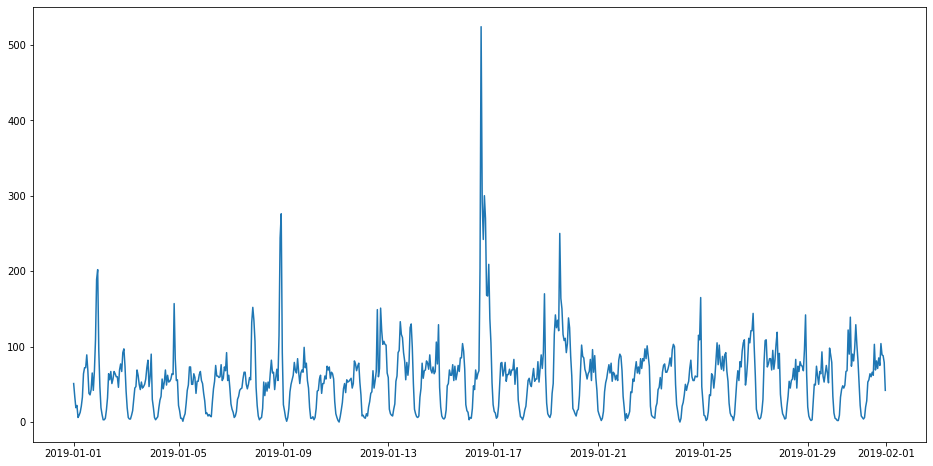

In [9]:
s = pd.DataFrame(index=[tw['datetime'] for tw in tweets])
s['x'] = [1]*len(s)
s.index = pd.to_datetime(s.index)
s = s.resample('1h').count()

plt.rcParams["figure.figsize"] = (16,8)
plt.plot(s)

### a

In [10]:
print(len(tweets))
x = filter_list(tweets, 'is_retweet', False)
x = select_fields(x, ['text'], as_list=True, unique=True)
print(len(x))

43007
25867


# prove

In [27]:
import stanza
stanza.download('it') # download model
nlp = stanza.Pipeline('it', processors='lemma,tokenize,ner') # initialize neural pipeline

2022-05-06 12:06:30 INFO: Downloading default packages for language: it (Italian)...
2022-05-06 12:06:32 INFO: File exists: C:\Users\leona\stanza_resources\it\default.zip.
2022-05-06 12:06:35 INFO: Finished downloading models and saved to C:\Users\leona\stanza_resources.
2022-05-06 12:06:35 WARNING: Language it package default expects mwt, which has been added
2022-05-06 12:06:35 INFO: Loading these models for language: it (Italian):
| Processor | Package  |
------------------------
| tokenize  | combined |
| mwt       | combined |
| lemma     | combined |
| ner       | fbk      |

2022-05-06 12:06:35 INFO: Use device: cpu
2022-05-06 12:06:35 INFO: Loading: tokenize
2022-05-06 12:06:35 INFO: Loading: mwt
2022-05-06 12:06:35 INFO: Loading: lemma
2022-05-06 12:06:35 INFO: Loading: ner
2022-05-06 12:06:36 INFO: Done loading processors!


In [42]:
def stanza_process(text):
    process = nlp(text)
    text = ' '.join([w['lemma'] for w in process.to_dict()[0] if 'lemma' in w])

    entities = []
    for e in process.entities:
        entities.append({'text': e.text, 'type': e.type})
    
    return text, entities

text = 'Higuain e Morata, uno scambio da brividi' #x[3]
stanza_process(text)

('higuain e morata , uno scambio da brivido',
 [{'text': 'Higuain', 'type': 'PER'}, {'text': 'Morata', 'type': 'PER'}])